In [1]:
import random

import numpy as np
import torch
import math
import torch.nn as nn
from PIL import Image
from torch.autograd import Variable
from torchvision.transforms import transforms

from commons import inc_convolution, inc_convolution2, inc_max_pool, inc_max_pool2
from imagenet_classes import class_names
from vgg16 import VGG16
from vgg16_inc_v2 import IncrementalVGG16V2


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
batch_size = 1
patch_size = 4
input_size = 224

image_patches = torch.cuda.FloatTensor(3, patch_size, patch_size).fill_(0).repeat(batch_size, 1, 1)

x_loc = random.sample(range(0, input_size - patch_size), batch_size)
y_loc = random.sample(range(0, input_size - patch_size), batch_size)
patch_locations = zip(x_loc, y_loc)
patch_locations = [(0, 0)]

loader = transforms.Compose([transforms.Resize([224, 224]), transforms.ToTensor()])
images = Image.open('./dog_resized.jpg')
images = loader(images)

images = images.unsqueeze(0)
#images = images.repeat(batch_size, 1, 1, 1)

#for i,(x,y) in enumerate(patch_locations):
#    images[i, :, x:x+patch_size, y:y+patch_size] = image_patch

y = VGG16().forward(images.cuda())

patch_locations = torch.from_numpy(np.array(patch_locations, dtype=np.int32))

inc_model = IncrementalVGG16V2(images, beta=1.0)

inc_model.eval()
x = inc_model.forward_gpu2(image_patches, patch_locations, patch_size, patch_size)
# print(class_names[np.argmax(x.data.cpu().numpy()[0, :])])

temp = y[:,:,0:patch_size+2,0:patch_size+2] - x
print(np.max(np.abs(temp.cpu().data.numpy())))

(6, 6)
6.2646


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

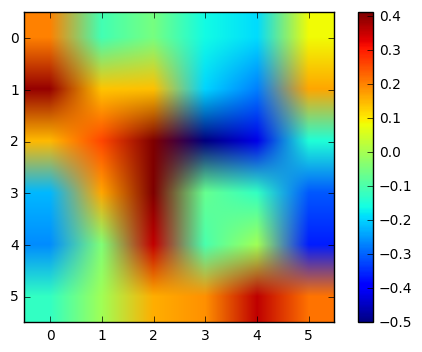

In [4]:
plt.imshow(temp[0,0,:,:].cpu().data.numpy())
plt.colorbar()

In [5]:
temp[0,0,:,:].cpu().data.numpy()

array([[ 0.20223159, -0.10871318, -0.05108744, -0.16216537, -0.18955454,
         0.08633256],
       [ 0.39151955,  0.13731384,  0.14153579, -0.19662386, -0.27106926,
         0.16793859],
       [ 0.14834559,  0.26104167,  0.40858877, -0.50185204, -0.4172258 ,
        -0.14646682],
       [-0.22257757,  0.16714256,  0.4110301 , -0.06874114, -0.12583557,
        -0.30860132],
       [-0.26205182, -0.04046071,  0.35449535, -0.10057262, -0.0040428 ,
        -0.36227587],
       [-0.12668371, -0.00344789,  0.15831083,  0.18811752,  0.36107078,
         0.21492371]], dtype=float32)